<a href="https://colab.research.google.com/github/Aryasita629/Aryasita629.github.io/blob/main/FIX_SKRIPSI_NAIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [30]:
dataset = pd.read_excel('DATA DIAGNOSA KELUHAN.xlsx')
dataset.head()

,Hasil Diagnosa,P1 (Nyeri pinggang),P2 (Tenggorokan nyeri),P3 (Batuk),P4 (Nyeri pada persendian),P5 (Nyeri Lutut),P6 (Pusing),P7 (Nyeri leher),P8 (Nyeri perut sebelah kanan),P9 (Panas),...,P17 (Iritasi di sekitar anus),P18 (Pembengkakan pembuluh darah yang terletak di anus),P19 (Kontrol piskosa),P20 (Gangguan mental berat),P21 (Mata kanan merah),P22 (Infeksi pada kornea mata),P23 ( Pembengkakan pada kulit),P24 ( Kaki kanan bengkak),P25 (Bising usus meningkat),P26 ( Nyeri lambung )
0,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,myalgia,0,1,1,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,myalgia,0,0,0,1,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,myalgia,1,0,0,0,0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]].values
y = dataset.iloc[:, -1].values

In [32]:
print(x)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
# Set training data dan testing data: 80% - 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  296
x_test =  74
y_train =  296
y_test =  74


In [35]:
print(x_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
print(x_test)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [38]:
print(y_test)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
print(x_train)

[[-0.30372837  3.29241553 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 ...
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]]


In [41]:
print(x_test)

[[-0.30372837 -0.30372837 -0.33583025 ...  3.22251693  3.22251693
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [ 3.29241553 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 ...
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]
 [-0.30372837 -0.30372837 -0.33583025 ... -0.31031645 -0.31031645
  -0.10118749]]


In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_test, y_test)

GaussianNB()

In [43]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[60  7]
 [ 0  7]]


In [45]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      0.90      0.94        67
           1       0.50      1.00      0.67         7

    accuracy                           0.91        74
   macro avg       0.75      0.95      0.81        74
weighted avg       0.95      0.91      0.92        74



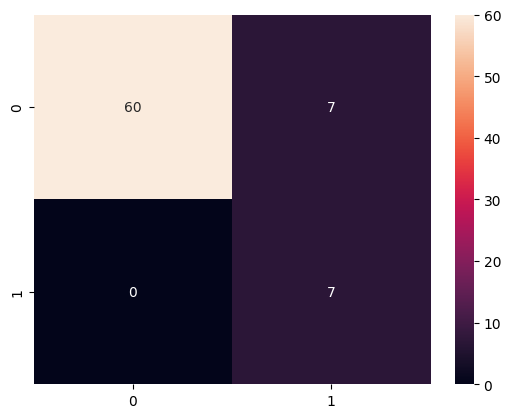

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.show()


In [54]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :90 persen


In [55]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
print('Precision: %.3f' % precision)

Precision: 0.500


In [56]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('recall: %.3f' % recall)

recall: 1.000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the database
data = pd.read_excel("DATA DIAGNOSA KELUHAN2.xlsx")

# Assuming the first row contains diagnostic results
diagnostic_results = data.iloc[0, 1:]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diagnostic_results, labels=diagnostic_results.index, autopct='%1.1f%%', startangle=140)

plt.title("Circular Diagram")

# Display the plot
plt.show()


FileNotFoundError: ignored

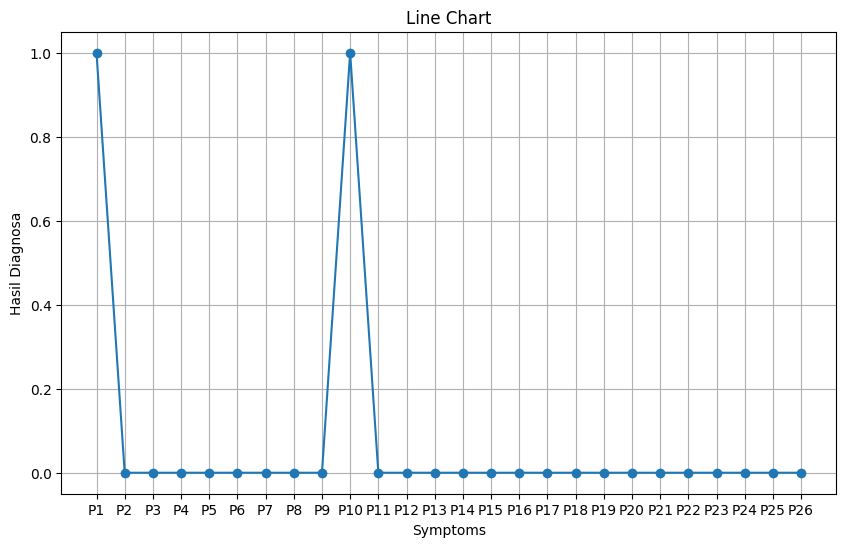

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the database
data = pd.read_excel("DATA DIAGNOSA KELUHAN2.xlsx")

# Assuming the first row contains diagnostic results
diagnostic_results = data.iloc[0, 1:]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(diagnostic_results.index, diagnostic_results, marker='o', linestyle='-')

plt.title("Line Chart")
plt.xlabel('Symptoms')
plt.ylabel('Hasil Diagnosa')
plt.grid(True)

# Display the plot
plt.show()
